In [36]:
import numpy as np
import matplotlib.pyplot as plt

### **Lab 12: Time Integration**


Lab Goals
*  Understand intial value problems and how to implement the Euler method and Midpoint point
*  Compare the two approaches


#### **1. Euler Method By Hand** 
 
 You are given the ordinary differential equation and initial condition
 
$$\frac{dy}{dt}-1-t^2-y=0; \quad y(0)=1$$


*   What is the order of the ODE?
*   Is it linear or nonlinear? What does it mean to be nonlinear?
*   **On a piece of paper**, set-up the given ODE in the form 

$$\frac{dy}{dt} = f(t,y)$$

* What is $f(x,y)$ in this case ?

The Euler's solution is given by:

$$y_{k+1} = y_k + \frac{dy}{dt}(t_k,y_k) h$$

* **On a piece of paper**, use the Euler Method to calculate the approximate solution at $y(0.1)$ and $y(0.2)$.




#### **2. Euler Method in Python**

Write a function called in Python that uses the Euler method to find the solution for an ODE. Test your function by integrating the ODE given in Problem 1 over the interval $t=[0,2]$ using a step size of $h=0.1$.

The function should accept the following arguments as input


*   $f(t,y)$ 
*   the inital condition 
*   the step size
*   the initial and final values of the interval, i.e. [0,2]

The function should return an array of $t$ values and $y$ values

Plot the solution and compare the plot of the solution with the plot of the exact solution of the ODE which is given by:

\begin{equation}
y(x)  = -t^2-2t+4e^t-3 \nonumber
\end{equation}


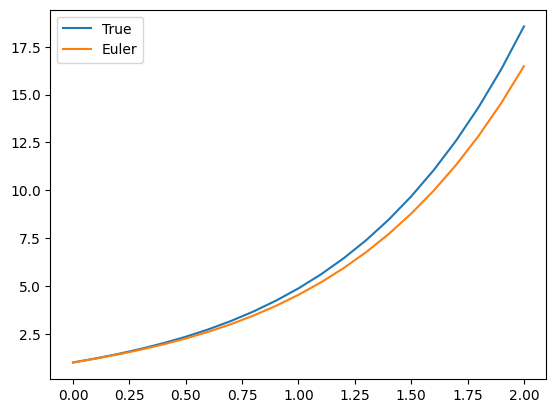

In [37]:
def f(t,y):
    return 1 + t**2 + y

def EulerMethod(f, IC, h, a, b):
    t = np.arange(a, b+h, h)

    # initial solution
    y_sol = np.zeros_like(t,dtype=float)
    y_sol[0] = IC
    for i in range(1,len(t)):
        y_sol[i] = y_sol[i-1] + f(t[i-1],y_sol[i-1])*h
    
    return t, y_sol

def y_true(t):
    return -t**2 - 2*t + 4*np.exp(t) - 3

IC = 1
a = 0
b = 2
h = 0.1

[t,y_Eul] = EulerMethod(f, IC , h, a, b)
true_y = y_true(t)

plt.plot(t,true_y,label='True')
plt.plot(t,y_Eul,label='Euler')
plt.legend()
plt.show()

#### **3. Improved Euler with a Midpoint Derivative By Hand**

The midpoint method uses a similar process to Euler's method but the solution is given by:

$$y_{k+1} = y_k + \frac{dy}{dt}(t_k+\frac{h}{2},y_k + \frac{dy}{dt}(t_k,y_k)\frac{h}{2})h$$

A summary of the steps:

1. Find $y$ at $t + \frac{h}{2}$ using Euler's method.

2. Evaluate $\frac{dy}{dt}$ using your new $t$ and $y$ from step 1.

3. Perform $y_{k+1} = y_k + \left(\frac{dy}{dt}\right)_{m}h$ where $\left(\frac{dy}{dt}\right)_m$ is the value obtained in step 2.


Use the Midpoint method to calculate the approximate solution at $y(0.1)$ and $y(0.2)$.

#### **4. Improved Euler Using a Midpoint Derivative in Python**
 
Write a function in Python that uses the Midpoint method to return the solution of ODE. Test your function using the ODE given in Problem 1 over the interval $t=[0,2]$ using a step size of $h=0.1$

Use the same strategy used in Problem 1. The only difference will be the implementation of how the solution is calculated inside of the for-loop.

Plot your solution and the exact solution.

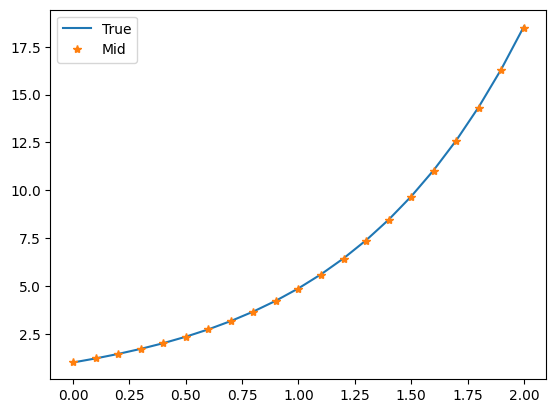

In [38]:
def EulerMidpoint(f, IC, h, a, b):
    t = np.arange(a, b+h, h)

    # initial solution
    y_sol = np.zeros_like(t,dtype=float)
    y_sol[0] = IC
    for i in range(1,len(t)):
        y_mid = y_sol[i-1] + f(t[i-1],y_sol[i-1]) * h/2
        y_sol[i] = y_sol[i-1] + f(t[i-1] + h/2, y_mid)*h
    
    return t, y_sol

[t,y_Mid] = EulerMidpoint(f, IC, h, a, b)

plt.plot(t,true_y,label='True')
plt.plot(t,y_Mid,'*',label='Mid')
plt.legend()
plt.show()

#### **5. Improved Euler Method Using the Average Derivative by Hand**

Average Derivative Euler method integrates the ODE using the following steps:

1. Calculate the predicted $y_{k+1}$ from Euler's method
 
 $$y_{k+1} = y_k + \frac{dy}{dt}(t_k,y_k) h$$

2. Evaluate $\left(\frac{dy}{dt}\right)_{k+1}$ from the predicted $y_{k+1}$ from step 1

3. Let:

$$ \frac{dy}{dt}_{ave} = \frac{1}{2}\left(\left(\frac{dy}{dt}\right)_k + \left(\frac{dy}{dt}\right)_{k+1} \right)$$

4. Correct the predicted estimate by:

$$y_{k+1} = y_k + \frac{dy}{dt}_{ave} h $$

Use the Heun method to calculate the approximate solution at $y(0.1)$ and $y(0.2)$.


#### **6. Improved Euler Method Using the Average Derivative in Python**

Write a function that integrates an ODE using the average derivative Euler method. Test your function using the ODE given in Problem 1 over the interval $t=[0,2]$ using a step size of $h=0.1$

Plot your solution and the exact solution.

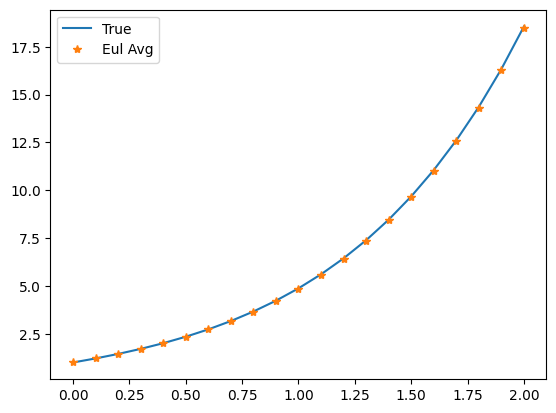

In [39]:
def EulerAverage(f, IC, h, a, b):
    t = np.arange(a, b+h, h)

    # initial solution
    y_sol = np.zeros_like(t,dtype=float)
    y_sol[0] = IC
    for i in range(1,len(t)):
        ykp1 = y_sol[i-1] + f(t[i-1], y_sol[i-1])*h # y at next time step
        dydt_k = f(t[i-1],y_sol[i-1]) # derivative at current time step
        dydt_kp1 = f(t[i-1]+h,ykp1) # derivative at next time step

        dydt_avg = (dydt_k + dydt_kp1) / 2 # average derivative

        y_sol[i] = y_sol[i-1] + dydt_avg*h
    
    return t, y_sol

[t,y_Avg] = EulerAverage(f, IC, h, a, b)

plt.plot(t,true_y,label='True')
plt.plot(t,y_Avg,'*',label='Eul Avg')
plt.legend()
plt.show()

#### **7. Runge-Kutta Integration By Hand**

Runge-Kutta is similar to the average derivative method, but it uses a weighted average of a few approximations of the derivative. The most widely used RK method is 4th order, which is given by 

$$y_{k+1} = y_k + h(\frac{1}{6}f_1 + \frac{2}{6}f_2 + \frac{2}{6}f_3 + \frac{1}{6}f_4)_k$$

where 

$$f_1 = f(t_k,y_k)$$
$$f_2 = f(t_k + \frac{h}{2},y_k + \frac{h}{2}f_1)$$
$$f_3 = f(t_k + \frac{h}{2},y_k + \frac{h}{2}f_2)$$
$$f_4 = f(t_k + {h},y_k + {h}f_3)$$

To really illustrate this process, calculate $y(0.1)$ by hand for the ODE from problem 1:

$$\frac{dy}{dt}-1-t^2-y=0; \quad y(0)=1$$

#### **8. Runge-Kutta Integration in Python**

Write a function that integrates an ODE using 4th order Runge-Kutta. Test your function using the ODE given in Problem 1 over the interval $t=[0,2]$ using a step size of $h=0.1$

Plot your solution and the exact solution.

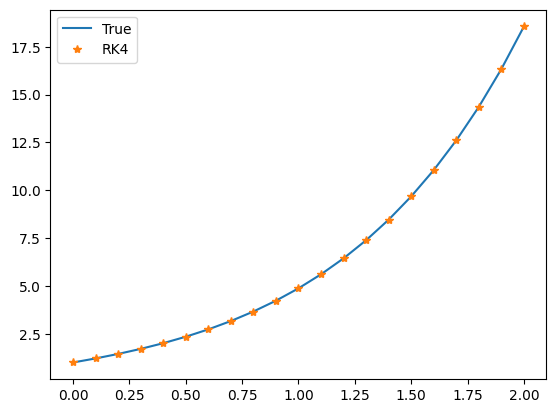

In [40]:
def RK4(f, IC, h, a, b):
    t = np.arange(a, b+h, h)

    # initial solution
    y_sol = np.zeros_like(t,dtype=float)
    y_sol[0] = IC
    for i in range(1,len(t)):

        f1 = f(t[i-1],y_sol[i-1])
        f2 = f(t[i-1] + h/2, y_sol[i-1] + f1*h/2)
        f3 = f(t[i-1] + h/2, y_sol[i-1] + f2*h/2)
        f4 = f(t[i-1] + h, y_sol[i-1] + f3*h)

        y_sol[i] = y_sol[i-1] + (1/6*f1 + 2/6*f2 + 2/6*f3 + 1/6*f4)*h
    
    return t, y_sol

[t,y_RK] = RK4(f, IC, h, a, b)

plt.plot(t,true_y,label='True')
plt.plot(t,y_RK,'*',label='RK4')
plt.legend()
plt.show()

#### **9. Comparison of Error**

We can see that the Improved Euler and RK Methods are both extremely close to the exact solution. Let's try plotting the errors for all four methods on the same plot. 

Try the error plot again with only the Improved Euler and RK methods included. 


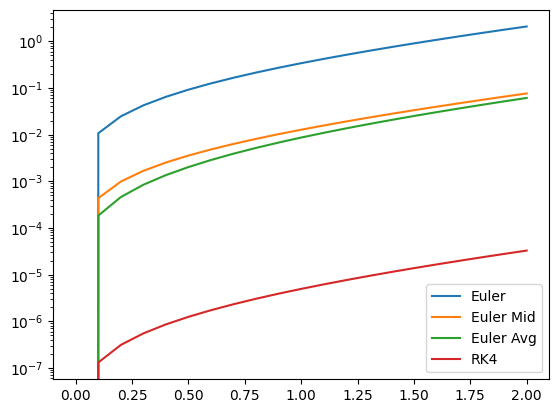

In [41]:
error_Euler = abs(y_Eul - true_y)
error_Midpoint = abs(y_Mid - true_y)
error_Average = abs(y_Avg - true_y)
error_RK4 = abs(y_RK - true_y)

plt.semilogy(t,error_Euler,label='Euler')
plt.semilogy(t,error_Midpoint,label='Euler Mid')
plt.semilogy(t,error_Average,label='Euler Avg')
plt.semilogy(t,error_RK4,label='RK4')
plt.legend()
plt.show()

#### **10. Higher order ODEs**

Given the second order differential equation: 

 $$\frac{d^2y}{dt^2} -0.5t+ y^2=0$$

 express the equation in state space form, i.e. express it as a system of first order differential equations. To do this follow these steps:

1.   Define $y = y_1$ and $\dot{y} = y_2$

2.   Define the vector $\boldsymbol{Y} = [y_1 \quad y_2]^T$

3.   Define the vector $\boldsymbol{F} = [\dot{y_1} \quad \dot{y_2}]^T$

4.   Fill in the right hand side of the equation in 3 with the appropriate expressions for $\dot{y_1}$ and $\dot{y_2}$




#### **Demonstration: Orbital System**

You may remember the force of gravity from physics II to be

$$F = \frac{G m_1 m_2}{r^2}$$

Where $m_1$ is the mass of the central body (usually the earth), $m_2$ is the mass of the satellite and $r$ is the distance between them. 

To find the equation of motion for the satellite ($m_2$) we would rearrange $F = ma$ as 

$$a_2 =  \frac{F}{m_2}$$

or 

$$a_2 = \frac{G m_1}{r^2}$$

At this point it is usefull to assume that our the force from the satellite isn't moving our central body (a pretty good assumption!) We will drop the 2 subscript of our acceleration and treat $a$ as the acceleration of our satellite only. We also condense $G m_1$ into the parameter $\mu$.

To make this a proper equation of motion we want to track both the magnitude and direction of the acceleration (i.e. a vector,) not just the scalar magnitude as we have been. To do this we multiply the right hand side by the negative of the unit vector of the radius, because the force of Gravity always points back towards the second body. Perhaps an image will make this clearer.

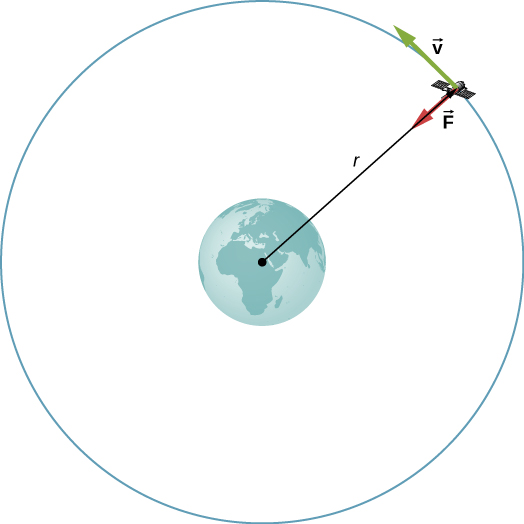


So we will represent the orbit equation of motion (EOM) like this:

$$\mathbf{a} = -\frac{\mu}{||\mathbf{r}||^2} \frac{\mathbf{r}}{||\mathbf{r}||}$$

or

$$\mathbf{a} = -\frac{\mu}{||\mathbf{r}||^3} \mathbf{r}$$

If you recall that acceleration is the second derivaitve of position, we suddenly have a second order differential equation
$$\ddot{\mathbf{r}} = -\frac{\mu}{||\mathbf{r}||^3} \mathbf{r}$$

Changing this into two first order differential equations yields

$$\dot{\mathbf{r}} = \mathbf{v}$$
$$\dot{\mathbf{v}} = -\frac{\mu}{||\mathbf{r}||^3} \mathbf{r}$$

where $\mathbf{v}$ is the velocity.

Lets make one more assumption that we are in the equatorial plane. This is just a fancy way of saying that $z$ is zero the whole time so we can ignore it. 
$$\mathbf{r} = [x,\,y,\,z]^T → \mathbf{r} = [x,\,y]^T$$

Now we have two second order differential equations

$$\ddot{x} = -\frac{\mu}{||\mathbf{r}||^3}x$$

and

$$\ddot{y} = -\frac{\mu}{||\mathbf{r}||^3}y$$

which could be written as four first order differential equations. lets stack them in a matrix by performing the following

$$\begin{bmatrix} \dot{x} \\ \dot{y} \\ \ddot{x} \\ \ddot{y} \end{bmatrix} = \begin{bmatrix} 0 & 0 & 1 & 0 \\ 0 & 0 & 0 & 1 \\ -\frac{\mu}{||\mathbf{r}||^3} & 0 & 0 & 0 \\ 0 & -\frac{\mu}{||\mathbf{r}||^3}& 0 & 0 \end{bmatrix}\begin{bmatrix} x \\ y \\ \dot{x} \\\dot{y} \end{bmatrix}$$

From here on out lets call this $4\times4$ matrix $\mathbf{F}$, and the vector stack of ${\mathbf{r}}$ and ${\mathbf{v}}$ we will call $\mathbf{q}$

Therfore our differential equation is in the form:

$$\dot{\mathbf{q}} = \mathbf{F} \mathbf{q}$$

Follow along with the comments in the code to see how we can integrate this.

In [42]:
mu = 3.986004418*10**5                 #km^3/s^2 ----- gravitational constant for the earth

# Establish some orbital parameters --- Change these values to see other orbits

a = 7600                               #km  ----- Semi Major Axis (size of our orbit)
e = 0.3                                #unitless ----- Eccentricity (how squished our orbit is. 0 = circle, 0.99 = extremely squished)

# Translate the orbital parameters to an initial position and velocity. Dont worry about the math behind this. 

T = 2*np.pi*np.sqrt(a**3/mu);          # s ----- orbital period (how long 1 orbit takes)

rx0 = (1-e)*a                          # km
ry0 = 0                                # km
vx0 = 0                                # km/s
vy0 = np.sqrt(((1+e)*mu)/((1 - e)*a))  # km/s

q0 = np.array([[rx0],[ry0],[vx0],[vy0]])

# define our dynamics (equation of motion) 

def EOM(q,mu):
  r = np.sqrt(q[0]**2 + q[1]**2)   # magnetude of radius

  F = np.zeros((4,4))
  F[0:2,2:4] = np.identity(2)
  F[2:4,0:2] = -mu/(r**3)*np.identity(2)

  dq = F @ q
  return dq.T

Now that we have our equations of motion and initial conditions set up, let's see how our different methods perform.

First lets look at Euler. From the lab we just did, we know that Euler method has the highest order of error. Lets try it with the following step sizes and see how it performs.

* h = 1s
* h = 10s
* h = 30s
* h = 60s

You will notice that all of these are integrated over the same amount of time, which has been chosen to be one full orbit. We should see all of these orbits come back to where they started; lets see if that happens.

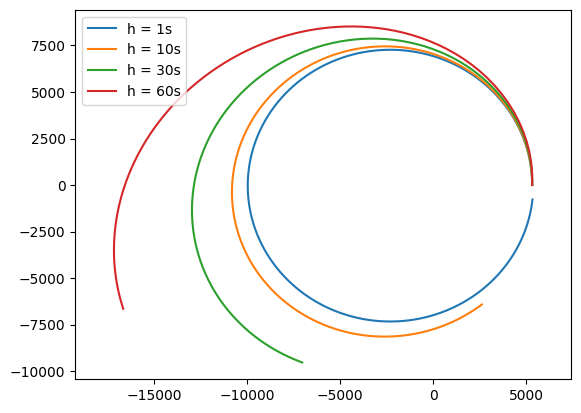

In [43]:
# step size
hs = [1,10,30,60]

for h in hs:
  # number of steps in one orbit 
  n = int(T/h + 1)


  #Euler Method

  q_euler = np.zeros((n,4))
  #q_euler.shape()
  q_euler[0,:] = q0.T

  for i in range(1,n):
    q_euler[i,:] = q_euler[i-1,:] + EOM(q_euler[i-1,:].T,mu)*h


  plt.plot(q_euler[:,0], q_euler[:,1])

plt.legend(["h = 1s","h = 10s","h = 30s","h = 60s"],loc = "upper left")
plt.gca().axis('equal')
plt.show()